In [2]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision import transforms

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import time

import warnings

warnings.simplefilter("ignore")


args = { 
    'batch_size': 20,
    'num_workers': 4,
    'num_classes':10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
    
}

if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])


cuda


In [3]:
#Carregando os dados
train_set = datasets.MNIST('./',
                           train=True,
                           transform = transforms.ToTensor(), 
                           target_transform = None, 
                           download = True)

In [4]:
test_set = datasets.MNIST('./',
                           train=False,
                           transform = transforms.ToTensor(), 
                           download = False)

In [5]:
print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de Teste: ' + str(len(test_set)))

Amostras de treino: 60000
Amostras de Teste: 10000


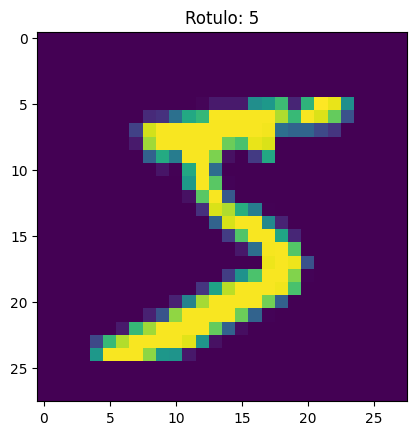

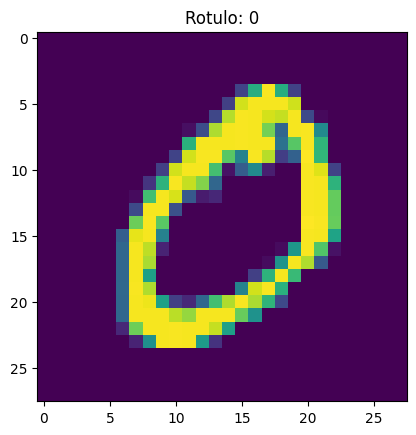

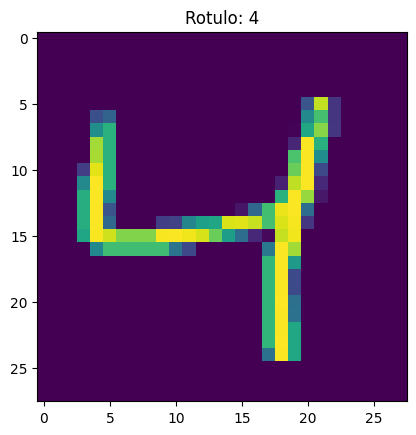

In [6]:
for i in range(3):
    dado,rotulo = train_set[i]

    plt.figure()
    plt.imshow(dado[0])
    plt.title('Rotulo: '+ str(rotulo))

In [7]:
# Criando os Batches
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

torch.Size([20, 1, 28, 28]) torch.Size([20])


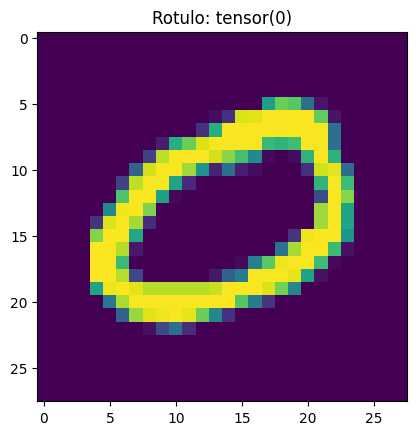

In [8]:
for batch in train_loader:
    dado, rotulo = batch
    print (dado.size(), rotulo.size())

    plt.imshow(dado[0][0])
    plt.title('Rotulo: '+ str(rotulo[0]))
    
    break


# Implementando o MLP

In [10]:
class NumberClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(NumberClassifier, self).__init__()
        
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        self.out     = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    
    def forward(self, X):

        X = X.view(X.size(0), -1)
        
        feature = self.features(X)
        output  = self.softmax(self.out(feature))

        return output


input_size = 28 * 28
hidden_size = 128
out_size = 10

torch.manual_seed(42)
net = NumberClassifier(input_size, hidden_size, out_size).to(args['device'])
        

# Definindo o loss e otimizador

In [12]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay= args['weight_decay'])

# Fluxo de treinamento

In [14]:
for epoch in range (args['num_epochs']):
    start = time.time()

    epoch_loss = []
    for batch in train_loader:
    
        dado, rotulo = batch

        # Cast na GPU
        dado   = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])

        # Forward 
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray(epoch_loss)
    end = time.time()
    print(" Epoca %d, Loss: %.4f +/- %.4f. Tempo: %.2f" % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start ))

 Epoca 0, Loss: 1.7747 +/- 0.1481. Tempo: 13.50
 Epoca 1, Loss: 1.7369 +/- 0.0991. Tempo: 13.29
 Epoca 2, Loss: 1.7857 +/- 0.1099. Tempo: 12.95
 Epoca 3, Loss: 1.8575 +/- 0.1119. Tempo: 13.12
 Epoca 4, Loss: 1.9225 +/- 0.1125. Tempo: 13.92
 Epoca 5, Loss: 1.9631 +/- 0.1152. Tempo: 16.32
 Epoca 6, Loss: 1.9986 +/- 0.1125. Tempo: 17.17
 Epoca 7, Loss: 2.0511 +/- 0.1094. Tempo: 15.32
 Epoca 8, Loss: 2.0382 +/- 0.1101. Tempo: 21.23
 Epoca 9, Loss: 2.0394 +/- 0.1112. Tempo: 14.11
 Epoca 10, Loss: 2.0239 +/- 0.1095. Tempo: 13.44
 Epoca 11, Loss: 2.0351 +/- 0.1096. Tempo: 13.49
 Epoca 12, Loss: 2.0687 +/- 0.1110. Tempo: 13.73
 Epoca 13, Loss: 2.1035 +/- 0.1048. Tempo: 13.27
 Epoca 14, Loss: 2.1198 +/- 0.1031. Tempo: 13.46
 Epoca 15, Loss: 2.1389 +/- 0.1065. Tempo: 13.63
 Epoca 16, Loss: 2.1589 +/- 0.1025. Tempo: 17.76
 Epoca 17, Loss: 2.1732 +/- 0.1000. Tempo: 20.12
 Epoca 18, Loss: 2.1865 +/- 0.0983. Tempo: 19.09
 Epoca 19, Loss: 2.2014 +/- 0.0974. Tempo: 19.35
 Epoca 20, Loss: 2.2147 +/- 0.

In [29]:
def train(train_loader, net, epoch):

  # Training mode
  net.train()
  
  start = time.time()
  
  epoch_loss  = []
  for batch in train_loader:
    
    dado, rotulo = batch
    
    # Cast do dado na GPU
    dado = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])
    
    # Forward
    ypred = net(dado)
    loss = criterion(ypred, rotulo)
    epoch_loss.append(loss.cpu().data)
    
    # Backpropagation
    loss.backward()
    optimizer.step()
   
  epoch_loss = np.asarray(epoch_loss)
  
  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  
  return epoch_loss.mean()

In [38]:
def validate(test_loader, net, epoch):

  # Evaluation mode
  net.eval()
  
  start = time.time()
  
  epoch_loss  = []
  
  with torch.no_grad(): 
    for batch in test_loader:

      dado, rotulo = batch

      # Cast do dado na GPU
      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Forward
      ypred = net(dado)
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

  epoch_loss = np.asarray(epoch_loss)
  
  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  
  return epoch_loss.mean()

In [40]:
train_losses, test_losses = [], []
for epoch in range(args['num_epochs']):
  
  # Train
  train_losses.append(train(train_loader, net, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 2.2887 +/- 0.0857, Time: 12.09
********** Validate **********
Epoch 0, Loss: 2.2920 +/- 0.0865, Time: 4.81

#################### Train ####################
Epoch 1, Loss: 2.2893 +/- 0.0829, Time: 13.98
********** Validate **********
Epoch 1, Loss: 2.2926 +/- 0.0848, Time: 5.96

#################### Train ####################
Epoch 2, Loss: 2.2840 +/- 0.0863, Time: 18.72
********** Validate **********
Epoch 2, Loss: 2.2803 +/- 0.0846, Time: 6.19

#################### Train ####################
Epoch 3, Loss: 2.2741 +/- 0.0875, Time: 13.15
********** Validate **********
Epoch 3, Loss: 2.2726 +/- 0.0857, Time: 4.62

#################### Train ####################
Epoch 4, Loss: 2.2680 +/- 0.0877, Time: 12.29
********** Validate **********
Epoch 4, Loss: 2.2673 +/- 0.0910, Time: 4.83

#################### Train ####################
Epoch 5, Loss: 2.2633 +/- 0.0924, Time: 12.63
********** Validate **********
Epoch 5, Loss: 2.264

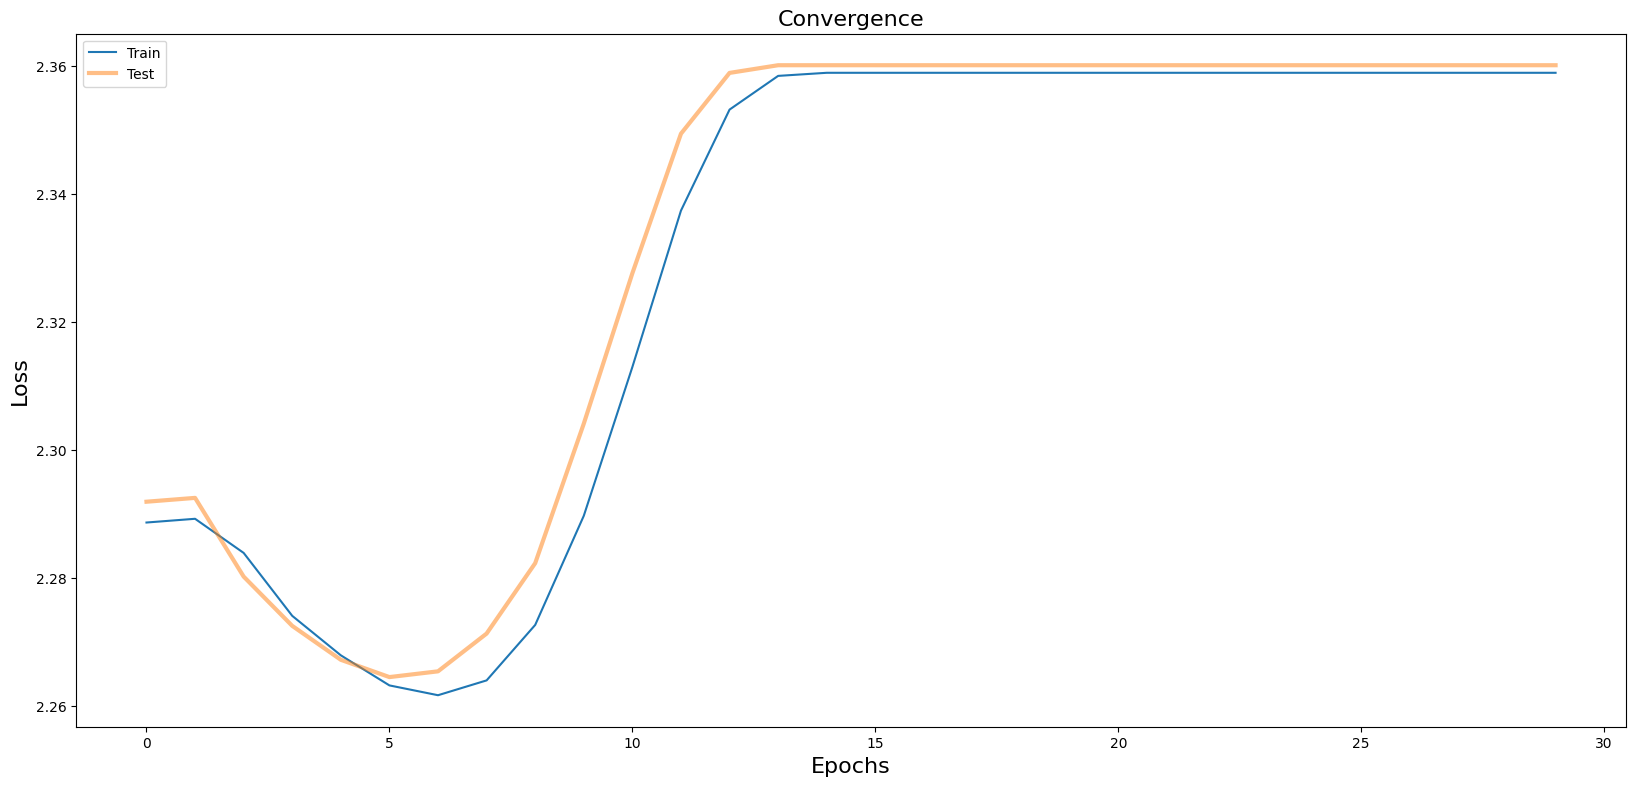

In [42]:
plt.figure(figsize=(20, 9))
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test', linewidth=3, alpha=0.5)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convergence', fontsize=16)
plt.legend()
plt.show()